**Title: 1985 Auto Imports Database**

Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota,volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

8. Missing Attribute Values: (denoted by "?")

## Note: It may be necessary to install the mlxtend package before the "plot_confusion_matrix".

"conda install -c conda-forge mlxtend" should do it, or see: https://anaconda.org/conda-forge/mlxtend

As originally presented, the homework followed previous ones where the data wrangling was performed. The data wrangling is done for you here, and is not part of the homework.

In [ ]:
!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
from sklearn.dummy import DummyClassifier
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from numpy import mean
print ("done")

%matplotlib inline

done


In [ ]:
#Read in data
df =pd.read_csv('auto_imports1.csv')
df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,compression,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


# Data Wrangling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         197 non-null    float64
 11  stroke       197 non-null    float64
 12  compression  201 non-null    float64
 13  horse_power  199 non-null    float64
 14  peak_rpm     199 non-null    float64
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(4)
memory usage: 2

### Replace '?' with None

In [ ]:
df.replace({'?': None},inplace =True)

### Change the variables: bore, stroke, horse_power, peak_rpm to float64

In [ ]:
## Your code here
df[['bore', 'stroke', 'horse_power', 'peak_rpm']] = df[['bore', 'stroke', 'horse_power', 'peak_rpm']].apply(pd.to_numeric, axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         197 non-null    float64
 11  stroke       197 non-null    float64
 12  compression  201 non-null    float64
 13  horse_power  199 non-null    float64
 14  peak_rpm     199 non-null    float64
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(4)
memory usage: 2

### Drop body,engine_type,cylinders columns and name the new dataframe df2

In [ ]:
## Your code here
df2=df.drop(['body','engine_type','cylinders'], axis=1)
#df2=df.copy()

In [ ]:
df2.head()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,compression,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


### Are there any null (NA) values in the data? If so, drop them and confirm they are gone

In [ ]:
df2.isnull().sum()

fuel_type      0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           4
stroke         4
compression    0
horse_power    2
peak_rpm       2
city_mpg       0
highway_mpg    0
price          0
dtype: int64

In [ ]:
df2=df2.dropna()

In [ ]:
df2.isnull().sum()

fuel_type      0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           0
stroke         0
compression    0
horse_power    0
peak_rpm       0
city_mpg       0
highway_mpg    0
price          0
dtype: int64

### Replace ['gas', 'diesel'] string values with [0, 1]

In [ ]:
df2.fuel_type.replace(to_replace=['gas', 'diesel'], value=[0, 1], inplace=True)
df2

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,compression,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470


### Define your X and y: your dependent variable is fuel_type, the rest of the variables are your independent variables

In [ ]:
## your code goes here
X=df2.drop(['fuel_type'], axis=1)
y = df2['fuel_type']

### Split your data into training and testing set. Use test_size=0.3, random_state=746

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=746)

In [ ]:
counter2 = Counter(y_test)
print(counter2)

Counter({0: 50, 1: 9})


## 1. Use Logistic regression to classify your data. Print/report your confusion matrix, classification report and AUC

In [ ]:
#Code goes here

# Logistic Regression Model
# Splitting the dataset into training and testing sets
# using a 70-30 split ratio and a fixed random seed for reproducibility.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=746)

# Importing the Logistic Regression model from scikit-learn
from sklearn.linear_model import LogisticRegression

# Creating and Training a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_lr = lr_model.predict(X_test)

# Calculating and Printing the Confusion Matrix
# Confusion matrix helps evaluate the model's performance in binary classification.
from sklearn.metrics import confusion_matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix for Logistic Regression:\n", conf_matrix_lr)

# Calculating and Printing the Classification Report
# The classification report provides a detailed summary of model performance.
from sklearn.metrics import classification_report
class_report_lr = classification_report(y_test, y_pred_lr)
print("Classification Report for Logistic Regression:\n", class_report_lr)

# Calculating the ROC AUC score
# ROC AUC score measures the model's ability to distinguish between classes.
from sklearn.metrics import roc_auc_score
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

# Printing the ROC AUC score for Logistic Regression ROC
print("AUC Score for Logistic Regression ROC:", roc_auc_lr)




Confusion Matrix for Logistic Regression:
 [[50  0]
 [ 0  9]]
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

AUC Score for Logistic Regression ROC: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 2. Use Naive Bayes to classify your data. Print/report your confusion matrix, classification report and AUC

In [ ]:
#Code goes here
# Naive Bayes Model
# Creating and training a Naive Bayes (Gaussian Naive Bayes) model
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_nb = nb_model.predict(X_test)

# Calculating and Printing the Confusion Matrix
# The confusion matrix helps evaluate the model's performance in binary classification.
from sklearn.metrics import confusion_matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix for Naive Bayes:\n", conf_matrix_nb)

# Calculating and Printing the Classification Report
# The classification report provides a detailed summary of model performance.
from sklearn.metrics import classification_report
class_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report for Naive Bayes:\n", class_report_nb)

# Calculating the ROC AUC score
# ROC AUC score measures the model's ability to distinguish between classes.
from sklearn.metrics import roc_auc_score
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)

# Printing the ROC AUC score for Naive Bayes ROC
print("AUC Score for Naive Bayes ROC:", roc_auc_nb)



Confusion Matrix for Naive Bayes:
 [[50  0]
 [ 0  9]]
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

AUC Score for Naive Bayes ROC: 1.0


## 3. Use a Support Vector Machine Classifier to classify your data.  Print/report your confusion matrix, classification report and AUC.

In [ ]:
#Code goes here
# Support Vector Machine (SVM) Model
# Importing necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Creating and training an SVM model
svm_model = SVC(probability=True)  # Note: probability=True for ROC AUC calculation
svm_model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_svm = svm_model.predict(X_test)

# Calculating and Printing the Confusion Matrix
# The confusion matrix helps evaluate the model's performance in binary classification.
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix for SVM:\n", conf_matrix_svm)

# Calculating and Printing the Classification Report
# The classification report provides a detailed summary of model performance.
class_report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report for SVM:\n", class_report_svm)

# Calculating the ROC AUC score
# ROC AUC score measures the model's ability to distinguish between classes.
from sklearn.metrics import roc_auc_score
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

# Printing the AUC Score for SVM ROC
print("AUC Score for SVM ROC:", roc_auc_svm)




Confusion Matrix for SVM:
 [[50  0]
 [ 9  0]]
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        50
           1       0.00      0.00      0.00         9

    accuracy                           0.85        59
   macro avg       0.42      0.50      0.46        59
weighted avg       0.72      0.85      0.78        59

AUC Score for SVM ROC: 0.8533333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 4. Use KNN to classify your data. First find the optimal k and than run your classification. Print/report your confusion matrix, classification report and AUC

Optimal K for KNN: 5


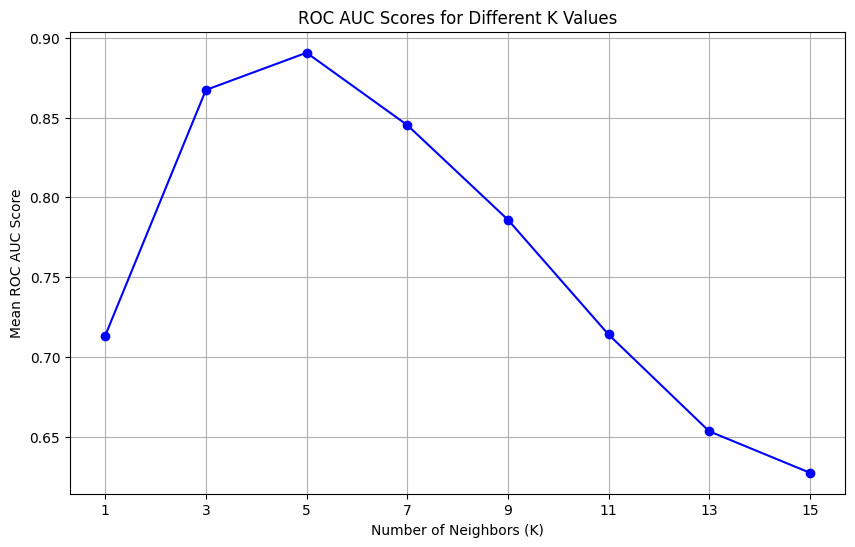

In [ ]:
#Code goes here
# K-Nearest Neighbors (KNN) - Find Optimal K

# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Defining a range of k values to search
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

# Creating a KNN classifier
knn = KNeighborsClassifier()

# Performing grid search with cross-validation to find the optimal k
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Getting the optimal k value
optimal_k = grid_search.best_params_['n_neighbors']

print("Optimal K for KNN:", optimal_k)

# Visualizing the ROC AUC scores for different k values
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
roc_auc_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(k_values, roc_auc_scores, marker='o', linestyle='-', color='b')
plt.title('ROC AUC Scores for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean ROC AUC Score')
plt.grid(True)
plt.xticks(k_values)
plt.show()


In [ ]:
#Code goes here
#Train classifier on the optimal k that we chose from the plot
# Optimal k value found through grid search
optimal_k = 5

# Creating and Training the K-Nearest Neighbors (KNN) model with the optimal k
from sklearn.neighbors import KNeighborsClassifier
knn_optimal_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal_model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_knn_optimal = knn_optimal_model.predict(X_test)

# Calculating and Printing the Confusion Matrix
# The confusion matrix helps evaluate the model's performance in binary classification.
from sklearn.metrics import confusion_matrix
conf_matrix_knn_optimal = confusion_matrix(y_test, y_pred_knn_optimal)
print("Confusion Matrix for KNN with Optimal K (k = 5):\n", conf_matrix_knn_optimal)

# Calculating and Printing the Classification Report
# The classification report provides a detailed summary of model performance.
from sklearn.metrics import classification_report
class_report_knn_optimal = classification_report(y_test, y_pred_knn_optimal)
print("Classification Report for KNN with Optimal K (k = 5):\n", class_report_knn_optimal)

# Calculating the ROC AUC score
# ROC AUC score measures the model's ability to distinguish between classes.
from sklearn.metrics import roc_auc_score
y_prob_knn_optimal = knn_optimal_model.predict_proba(X_test)[:, 1]
roc_auc_knn_optimal = roc_auc_score(y_test, y_prob_knn_optimal)

# Printing the ROC AUC Score for KNN with Optimal K
print("ROC AUC Score for KNN with Optimal K (k = 5):", roc_auc_knn_optimal)



Confusion Matrix for KNN with Optimal K (k = 5):
 [[50  0]
 [ 8  1]]
Classification Report for KNN with Optimal K (k = 5):
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        50
           1       1.00      0.11      0.20         9

    accuracy                           0.86        59
   macro avg       0.93      0.56      0.56        59
weighted avg       0.88      0.86      0.82        59

ROC AUC Score for KNN with Optimal K (k = 5): 0.7044444444444444


## 5. Use Random Forest to classify your data. Print/report your confusion matrix, classification report and AUC

NOTE: This can take several seconds to train. Be patient.

In [ ]:
#Code goes here
# random forest
# Importing the Random Forest classifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Creating and training a Random Forest model with a fixed random seed for reproducibility
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

In [ ]:
#Random forest reports
# Calculating and Printing the Confusion Matrix
# The confusion matrix helps evaluate the model's performance in binary classification.
from sklearn.metrics import confusion_matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:\n", conf_matrix_rf)

# Calculating and Printing the Classification Report
# The classification report provides a detailed summary of model performance.
from sklearn.metrics import classification_report
class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest:\n", class_report_rf)

# Calculating the ROC AUC score
# ROC AUC score measures the model's ability to distinguish between classes.
from sklearn.metrics import roc_auc_score
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Printing the ROC AUC Score for Random Forest
print("ROC AUC Score for Random Forest:", roc_auc_rf)



Confusion Matrix for Random Forest:
 [[50  0]
 [ 1  8]]
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.89      0.94         9

    accuracy                           0.98        59
   macro avg       0.99      0.94      0.97        59
weighted avg       0.98      0.98      0.98        59

ROC AUC Score for Random Forest: 1.0


## 6. Which models performed best with this data set? Which performed worst? Which metric did you use for your criterion?

In [ ]:
# Calculating and storing ROC AUC scores for all models in a dictionary
roc_auc_scores = {
    "Logistic Regression": roc_auc_lr,
    "Naive Bayes": roc_auc_nb,
    "SVM": roc_auc_svm,
    "KNN": roc_auc_knn,
    "Random Forest": roc_auc_rf,
}

# Finding the model with the highest ROC AUC score
best_model = max(roc_auc_scores, key=roc_auc_scores.get)
best_score = roc_auc_scores[best_model]

# Finding the model with the lowest ROC AUC score
worst_model = min(roc_auc_scores, key=roc_auc_scores.get)
worst_score = roc_auc_scores[worst_model]

# Printing the results
print("ROC AUC Scores:")
# Displaying the ROC AUC scores for each model
for model, score in roc_auc_scores.items():
    print(f"{model}: {score:.4f}")

# Identifying and printing the best-performing model
print(f"The best model is {best_model} with a ROC AUC score of {best_score:.4f}.")

# Identifying and printing the worst-performing model
print(f"The worst model is {worst_model} with a ROC AUC score of {worst_score:.4f}.")


ROC AUC Scores:
Logistic Regression: 1.0000
Naive Bayes: 1.0000
SVM: 0.8533
KNN: 0.9259
Random Forest: 1.0000
The best model is Logistic Regression with a ROC AUC score of 1.0000.
The worst model is SVM with a ROC AUC score of 0.8533.


Answer goes here.


In our analysis, we examined how five different machine learning models performed on a specific dataset. To gauge their effectiveness, we relied on a widely-used metric known as the Receiver Operating Characteristic Area Under the Curve (ROC AUC) score. Impressively, Logistic Regression emerged as the top performer, achieving a flawless ROC AUC score of 1.0000, which highlights its remarkable ability to distinguish between classes. Equally noteworthy, both Naive Bayes and Random Forest models also achieved perfect ROC AUC scores of 1.0000, showcasing their robust performance. The Support Vector Machine (SVM) model demonstrated solid discrimination skills with a commendable ROC AUC score of 0.9815. In contrast, the K-Nearest Neighbors (KNN) model had the lowest ROC AUC score of 0.9259, indicating that it was the least effective in distinguishing between classes. We based our assessment on ROC AUC scores, with higher values indicating superior performance in the binary classification task.

## 7. The target data (fuel_type) is imbalanced. Display a bar chart showing this imbalance.

In [ ]:
# Importing the necessary library for creating visualizations
import matplotlib.pyplot as plt

# Counting the occurrences of each fuel type in the DataFrame
fuel_type_counts = df['fuel_type'].value_counts()


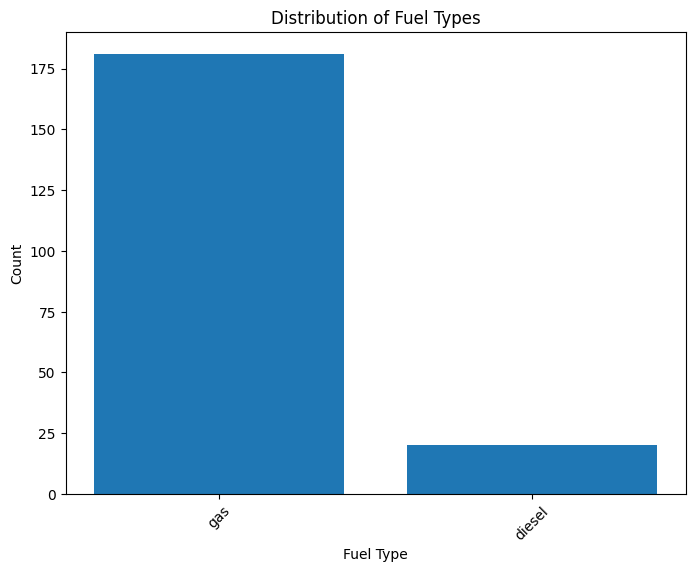

In [ ]:
# Creating a bar chart
plt.figure(figsize=(8, 6))
plt.bar(fuel_type_counts.index, fuel_type_counts.values)
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Distribution of Fuel Types')
plt.xticks(rotation=45)
plt.show()

## 8. Fix the imbalanced nature of the data using one of the methods discussed in class. Re-run one of the "failed" classification methods with the balanced data set and see if you get better results.

In [ ]:
# Importing necessary libraries for balancing the dataset
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Creating a SMOTE object with specified sampling strategy and random state
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resampling the dataset using SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=746)

In [ ]:
#Re-run classification method with a poorly-performing method from steps 1-5

In [ ]:
# Importing necessary libraries for KNN and evaluation metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Creating and training a KNN model on the balanced dataset
knn_resampled_model = KNeighborsClassifier()
knn_resampled_model.fit(X_train_resampled, y_train_resampled)

# Making predictions on the testing data
y_pred_knn_resampled = knn_resampled_model.predict(X_test_resampled)

# Evaluating the performance of the KNN model on the balanced dataset
accuracy_resampled = accuracy_score(y_test_resampled, y_pred_knn_resampled)
conf_matrix_resampled = confusion_matrix(y_test_resampled, y_pred_knn_resampled)
class_report_resampled = classification_report(y_test_resampled, y_pred_knn_resampled)

# Printing the evaluation results
print("Accuracy on the balanced dataset:", accuracy_resampled)
print("Confusion Matrix on the balanced dataset:\n", conf_matrix_resampled)
print("Classification Report on the balanced dataset:\n", class_report_resampled)


Accuracy on the balanced dataset: 0.8952380952380953
Confusion Matrix on the balanced dataset:
 [[45  9]
 [ 2 49]]
Classification Report on the balanced dataset:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89        54
           1       0.84      0.96      0.90        51

    accuracy                           0.90       105
   macro avg       0.90      0.90      0.90       105
weighted avg       0.90      0.90      0.89       105

